### Кумулятивные метрики для AB-тестирования

In [1]:
import pandas as pd

* **date** — дата наблюдения;
* **cid** — идентификатор посетителя;
* **transactions** — количество совершённых целевых действий (транзакций);
* **revenue** — сумма покупки;
* **group** — группа (тестовая — А, контрольная — B).

In [6]:
sample_a = pd.read_csv('../data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('../data/ab_test-redesign_sample_b.csv')

sample_a.head(3)

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A


In [7]:
sample_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61571 entries, 0 to 61570
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          61571 non-null  object 
 1   cid           61571 non-null  float64
 2   transactions  61571 non-null  int64  
 3   revenue       61571 non-null  int64  
 4   group         61571 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


In [67]:
sample_a['date'] = pd.to_datetime(sample_a['date'])
grouped_a = sample_a.groupby('date').agg({'transactions': 'sum', 'revenue': ['sum', 'mean'], 'cid': 'nunique'})

grouped_a.columns = ["_".join(a) for a in grouped_a.columns.to_flat_index()]
grouped_a.head(3)


,transactions_sum,revenue_sum,revenue_mean,cid_nunique
date,,,,
2020-11-06,16,1577279,612.297748,2576
2020-11-07,23,1721886,636.792160,2704
2020-11-08,25,846051,252.251342,3354


In [90]:
sample_b['date'] = pd.to_datetime(sample_b['date'])
grouped_b = sample_b.groupby('date').agg({'transactions': 'sum', 'revenue': ['sum', 'mean'], 'cid': 'nunique'}, as_index=False)

grouped_b.columns = ["_".join(a) for a in grouped_b.columns.to_flat_index()]
grouped_b.head(3)

,transactions_sum,revenue_sum,revenue_mean,cid_nunique
date,,,,
2020-11-06,19,996645,398.817527,2499
2020-11-07,19,555499,198.109486,2804
2020-11-08,24,3044842,925.202674,3291


In [69]:
# вычисляем кумулятивную сумму количества посетителей
grouped_a['cum_users_count'] = grouped_a['cid_nunique'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
grouped_a['cum_transactions'] = grouped_a['transactions_sum'].cumsum()
# вычисляем кумулятивную сумму трат
grouped_a['cum_revenue'] = grouped_a['revenue_sum'].cumsum()
grouped_a['cum_mean_revenue'] = grouped_a['revenue_mean'].cumsum()
grouped_a['cum_conversion'] = grouped_a['cum_transactions']/grouped_a['cum_users_count'] * 100
grouped_a.head(4)

,transactions_sum,revenue_sum,revenue_mean,cid_nunique,cum_users_count,cum_transactions,cum_revenue,cum_mean_revenue,cum_conversion
date,,,,,,,,,
2020-11-06,16,1577279,612.297748,2576,2576,16,1577279,612.297748,0.621118
2020-11-07,23,1721886,636.792160,2704,5280,39,3299165,1249.089908,0.738636
2020-11-08,25,846051,252.251342,3354,8634,64,4145216,1501.341250,0.741256
2020-11-09,18,708830,219.180581,3234,11868,82,4854046,1720.521831,0.690934


In [70]:
# вычисляем кумулятивную сумму количества посетителей
grouped_b['cum_users_count'] = grouped_b['cid_nunique'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
grouped_b['cum_transactions'] = grouped_b['transactions_sum'].cumsum()
# вычисляем кумулятивную сумму трат
grouped_b['cum_revenue'] = grouped_b['revenue_sum'].cumsum()
grouped_b['cum_mean_revenue'] = grouped_b['revenue_mean'].cumsum()
grouped_b['cum_conversion'] = grouped_b['cum_transactions']/grouped_b['cum_users_count'] * 100
grouped_b.head(4)

,transactions_sum,revenue_sum,revenue_mean,cid_nunique,cum_users_count,cum_transactions,cum_revenue,cum_mean_revenue,cum_conversion
date,,,,,,,,,
2020-11-06,19,996645,398.817527,2499,2499,19,996645,398.817527,0.760304
2020-11-07,19,555499,198.109486,2804,5303,38,1552144,596.927013,0.716576
2020-11-08,24,3044842,925.202674,3291,8594,62,4596986,1522.129687,0.721434
2020-11-09,25,1285836,419.933377,3062,11656,87,5882822,1942.063064,0.746397


In [71]:
print(f'Средняя кумулятивная конверсия в группе A: {grouped_a["cum_conversion"].mean().round(2)}')
print(f'Средняя кумулятивная конверсия в группе B: {grouped_b["cum_conversion"].mean().round(2)}')

Средняя кумулятивная конверсия в группе A: 0.71
Средняя кумулятивная конверсия в группе B: 0.76


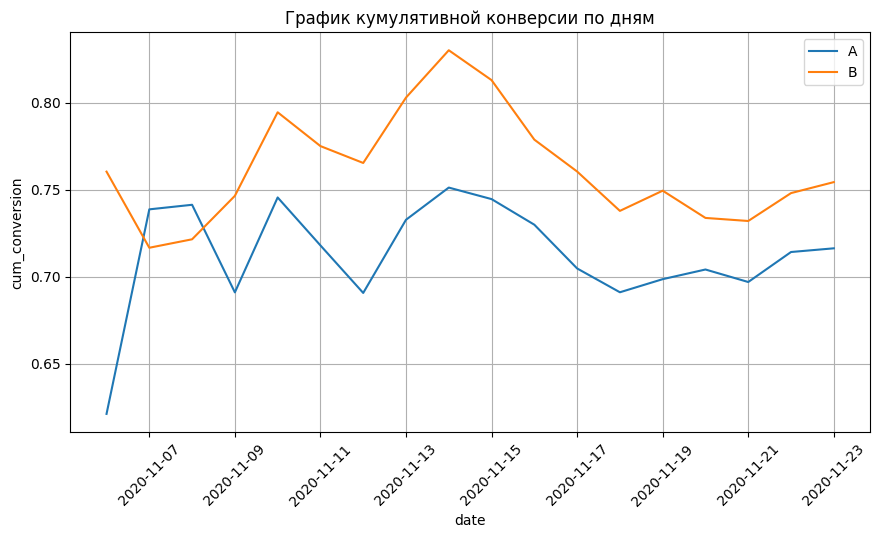

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=grouped_a, ax=ax, label='A')
sns.lineplot(x='date', y='cum_conversion', data=grouped_b, ax=ax, label='B')
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

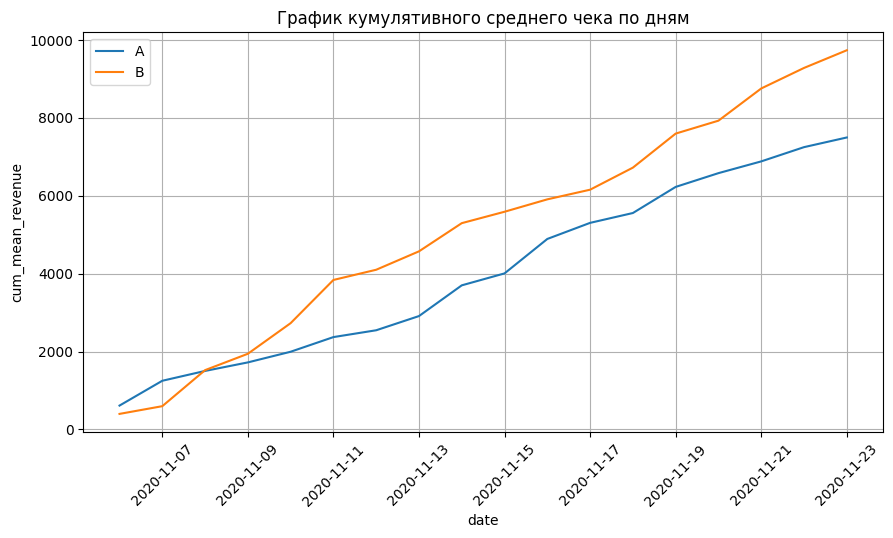

In [74]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивного среднего чека во времени в каждой группе
sns.lineplot(x='date', y='cum_mean_revenue', data=grouped_a, ax=ax, label='A')
sns.lineplot(x='date', y='cum_mean_revenue', data=grouped_b, ax=ax, label='B')
# задаём подпись к графику
ax.set_title('График кумулятивного среднего чека по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

Проверим гипотезу о равенстве конверсий в группах А и B при альтернативной гипотезе: Конверсия в группе А меньше, чем конверсия в группе B.

In [117]:
total_a = grouped_a.groupby('group').agg({'transactions_sum': 'sum', 'cid_nunique': 'sum'}).reset_index()
total_b = grouped_b.groupby('group').agg({'transactions_sum': 'sum', 'cid_nunique': 'sum'}).reset_index()
total_a['group'] = 'A'
total_b['group'] = 'B'
converted_piv = pd.concat([total_a, total_b], axis=0)

converted_piv

,group,transactions_sum,cid_nunique
0,A,441,61571
0,B,463,61383


In [119]:
from statsmodels.stats.proportion import proportions_ztest

# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А меньше, чем конверсия в группе B'
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['transactions_sum'], #число "успехов"
    nobs=converted_piv['cid_nunique'], #общее число наблюдений
    alternative='smaller',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 

p-value:  0.22
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


Проверим гипотезу о нормальности распределений ежедневного среднего чека с помощью критерия Шапиро-Уилка

In [120]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(grouped_a['revenue_mean'])
shapiro_result_b = shapiro(grouped_b['revenue_mean'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value группы А 0.43
# p-value группы B 0.12
# Принимаем нулевую гипотезу. Распределения в обеих группах нормальные

p-value группы А 0.01
p-value группы B 0.15
Отвергаем нулевую гипотезу. Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


Проверим гипотезу о равенстве ежедневных средних чеков с помощью критерия Манна-Уитни при альтернативной гипотезе: Ежедневный средний чек в группе А меньше, чем в группе B

In [122]:
from scipy.stats import mannwhitneyu

# нулевая и альтернативная гипотезы
H0 = 'Ежедневные средние чеки в группах А и B равны'
H1 = 'Ежедневный средний чек в группе А меньше, чем в группе B'
alpha = 0.1 # уровень значимости
# вычисляем значение p-value 
_, p_value = mannwhitneyu(
    grouped_a['revenue_mean'], 
    grouped_b['revenue_mean'], 
    alternative='less',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 

p-value:  0.07
Отвергаем нулевую гипотезу. Ежедневные средние чеки в группах А и B равны
Альтернативная гипотеза. H1: Ежедневный средний чек в группе А меньше, чем в группе B
